In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.svm import SVC
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#tuning
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('Consumer goods.csv')

In [3]:
df.head()

,Year,Type,Product group,Producer,Code,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,2018,Convenience stores,Meat,J&F,|13/12/38|,420,6.00,8.40,"$3,542.00","$2,528.40",29,Good Profit
1,2018,Convenience stores,Meat,J&F,|13/13/98|,480,6.10,7.40,"$3,558.40","$2,947.20",17,Acceptable Profit
2,2018,Convenience stores,Meat,J&F,|13/13/99|,528,5.40,7.60,"$4,019.84","$2,837.12",29,Good Profit
3,2018,Convenience stores,Coffee,J&F,|13/01/01|,4836,0.74,0.96,"$4,642.56","$3,578.64",23,Good Profit
4,2018,Convenience stores,Coffee,J&F,|13/01/01a|,5928,0.95,0.99,"$5,868.72","$5,631.60",4,Acceptable Profit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15117 non-null  object 
 1   Type             15117 non-null  object 
 2   Product group    15117 non-null  object 
 3   Producer         15117 non-null  object 
 4   Code             15117 non-null  object 
 5   Volume           15117 non-null  int64  
 6   Cost per unit    15117 non-null  float64
 7   Price per unit   15117 non-null  float64
 8   Revenues         15117 non-null  object 
 9   Total Cost       15117 non-null  object 
 10  Profit Percent   15117 non-null  int64  
 11  Summary Profits  15116 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Volume,Cost per unit,Price per unit,Profit Percent
count,15117.000000,15117.000000,15117.000000,15117.000000
mean,1437.010518,2.393392,3.201063,23.881193
std,1984.730748,1.414972,1.897611,12.935923
min,48.000000,0.400000,0.900000,-31.000000
25%,396.000000,1.140000,1.330000,15.000000
50%,792.000000,2.360000,3.240000,23.000000
75%,1452.000000,2.910000,3.920000,33.000000
max,9600.000000,6.700000,8.700000,66.000000


In [6]:
df.describe(exclude='number')

,Year,Type,Product group,Producer,Code,Revenues,Total Cost,Summary Profits
count,15117,15117,15117,15117,15117,15117,15117,15116
unique,4,3,15,124,4033,8151,8133,3
top,2014 (6m),Convenience stores,Fresh salads,North Cascade,|20/13/07|,$395.12,$72.00,Good Profit
freq,4032,12051,2770,899,4,17,23,7276


In [7]:
df.isna().sum()

Year               0
Type               0
Product group      0
Producer           0
Code               0
Volume             0
Cost per unit      0
Price per unit     0
Revenues           0
Total Cost         0
Profit Percent     0
Summary Profits    1
dtype: int64

In [8]:
df['Summary Profits'].fillna(df['Summary Profits'].mode()[0], inplace = True)

In [9]:
df['Summary Profits'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
15112    False
15113    False
15114    False
15115    False
15116    False
Name: Summary Profits, Length: 15117, dtype: bool

In [10]:
df.isna().sum()

Year               0
Type               0
Product group      0
Producer           0
Code               0
Volume             0
Cost per unit      0
Price per unit     0
Revenues           0
Total Cost         0
Profit Percent     0
Summary Profits    0
dtype: int64

In [11]:
df=df.drop(['Year','Code'],axis=1)
df.head()

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,Convenience stores,Meat,J&F,420,6.00,8.40,"$3,542.00","$2,528.40",29,Good Profit
1,Convenience stores,Meat,J&F,480,6.10,7.40,"$3,558.40","$2,947.20",17,Acceptable Profit
2,Convenience stores,Meat,J&F,528,5.40,7.60,"$4,019.84","$2,837.12",29,Good Profit
3,Convenience stores,Coffee,J&F,4836,0.74,0.96,"$4,642.56","$3,578.64",23,Good Profit
4,Convenience stores,Coffee,J&F,5928,0.95,0.99,"$5,868.72","$5,631.60",4,Acceptable Profit


In [12]:
df['Total Cost'] = df['Total Cost'].str.replace('$','')
df['Total Cost'] = df['Total Cost'].str.replace(',','')
df['Total Cost'] = df['Total Cost'].astype(float)

<ipython-input-12-c899c766a8e9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Total Cost'] = df['Total Cost'].str.replace('$','')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             15117 non-null  object 
 1   Product group    15117 non-null  object 
 2   Producer         15117 non-null  object 
 3   Volume           15117 non-null  int64  
 4   Cost per unit    15117 non-null  float64
 5   Price per unit   15117 non-null  float64
 6   Revenues         15117 non-null  object 
 7   Total Cost       15117 non-null  float64
 8   Profit Percent   15117 non-null  int64  
 9   Summary Profits  15117 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [14]:
df.head()

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,Convenience stores,Meat,J&F,420,6.00,8.40,"$3,542.00",2528.40,29,Good Profit
1,Convenience stores,Meat,J&F,480,6.10,7.40,"$3,558.40",2947.20,17,Acceptable Profit
2,Convenience stores,Meat,J&F,528,5.40,7.60,"$4,019.84",2837.12,29,Good Profit
3,Convenience stores,Coffee,J&F,4836,0.74,0.96,"$4,642.56",3578.64,23,Good Profit
4,Convenience stores,Coffee,J&F,5928,0.95,0.99,"$5,868.72",5631.60,4,Acceptable Profit


In [15]:
df['Revenues'] = df['Revenues'].str.replace('$','')
df['Revenues'] = df['Revenues'].str.replace(',','')
df['Revenues'] = df['Revenues'].astype(float)

<ipython-input-15-bedb2358a6d1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Revenues'] = df['Revenues'].str.replace('$','')


In [16]:
df.head()

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,Convenience stores,Meat,J&F,420,6.00,8.40,3542.00,2528.40,29,Good Profit
1,Convenience stores,Meat,J&F,480,6.10,7.40,3558.40,2947.20,17,Acceptable Profit
2,Convenience stores,Meat,J&F,528,5.40,7.60,4019.84,2837.12,29,Good Profit
3,Convenience stores,Coffee,J&F,4836,0.74,0.96,4642.56,3578.64,23,Good Profit
4,Convenience stores,Coffee,J&F,5928,0.95,0.99,5868.72,5631.60,4,Acceptable Profit


In [17]:
# Splitting data

# Split into training and test sets
training, test = train_test_split(
    df, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42 # so that regardless of how many times I run the code I will have the "exact" points
)

In [18]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["Type", "Product group","Producer"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(training[col_names]).toarray()

one_hot_df_val = one_hot.transform(test[col_names]).toarray()

In [19]:
# Look at the categories
one_hot.categories_

[array(['Convenience stores', 'Hypermarkets', 'Supermarkets'], dtype=object),
 array(['Alcohol', 'Beverages', 'Bread products', 'Cheese products',
        'Coffee', 'Corn flakes', 'Cosmetics', 'Delicatessen',
        'Fresh salads', 'Homecare products', 'Ice cream', 'Meat', 'Sauces',
        'Sweets', 'Vegetables'], dtype=object),
 array(['Aqua', 'Atkins', 'Barilla', 'Bavarian specialties', 'Bayer',
        'Beiersdorf', "Bella's", 'Bonduelle', 'Brembo', 'Buonissimi',
        'C&C vegetables', 'Caffe Italiano', 'Campari', 'Capy',
        'Cherry dreams', 'Chocopops', 'Chocowaff', 'Cibo italiano', 'Cif',
        'Cioccolatti Italiani', 'Cirio', 'Corny', 'Corosina',
        'Creamy treat', 'Danone', 'De Cecco', 'Delta', 'Dole', 'Doleo',
        'Dr Pepper', 'Earthbound', 'Famous Grousse', 'Fast&Easy',
        'Ferrero', 'Fresh express', 'Freshco', 'Garofalo',
        'Gelati e altro', 'Gelati italiani', 'Gelati veri', 'Genco',
        'Grana Padano', 'Green Farm', 'Green lamb', 'Green st

In [20]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['Type_Convenience stores',
 'Type_Hypermarkets',
 'Type_Supermarkets',
 'Product group_Alcohol',
 'Product group_Beverages',
 'Product group_Bread products',
 'Product group_Cheese products',
 'Product group_Coffee',
 'Product group_Corn flakes',
 'Product group_Cosmetics',
 'Product group_Delicatessen',
 'Product group_Fresh salads',
 'Product group_Homecare products',
 'Product group_Ice cream',
 'Product group_Meat',
 'Product group_Sauces',
 'Product group_Sweets',
 'Product group_Vegetables',
 'Producer_Aqua',
 'Producer_Atkins',
 'Producer_Barilla',
 'Producer_Bavarian specialties',
 'Producer_Bayer',
 'Producer_Beiersdorf',
 "Producer_Bella's",
 'Producer_Bonduelle',
 'Producer_Brembo',
 'Producer_Buonissimi',
 'Producer_C&C vegetables',
 'Producer_Caffe Italiano',
 'Producer_Campari',
 'Producer_Capy',
 'Producer_Cherry dreams',
 'Producer_Chocopops',
 'Producer_Chocowaff',
 'Producer_Cibo italiano',
 'Producer_Cif',
 'Producer_Cioccolatti Italiani',
 'Producer_Cirio',
 'Produ

In [21]:
oh_df = pd.DataFrame(
    one_hot_df,
    index=training.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(12093, 142)
(3024, 142)


In [22]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

training = training.merge(oh_df, on=training.index).set_index("key_0").drop(["Type", "Product group","Producer"], axis=1)
test = test.merge(oh_df_val, on=test.index).set_index("key_0").drop(["Type", "Product group","Producer"], axis=1)

print(training.shape)
print(test.shape)

(12093, 149)
(3024, 149)


In [23]:
training.head()

,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits,Type_Convenience stores,Type_Hypermarkets,Type_Supermarkets,...,Producer_Taylor farms,Producer_The food world,Producer_Tuborg,Producer_Turgsbro,Producer_Ulker,Producer_Unilever,Producer_Valtaro,Producer_Veet,Producer_WC Net,Producer_Wild West
key_0,,,,,,,,,,,,,,,,,,,,,
4679,120,1.07,1.39,166.80,128.40,23,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6634,816,2.25,3.43,2798.88,1836.00,34,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9775,2040,2.76,3.44,7017.60,5630.40,20,Acceptable Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15050,588,1.87,2.40,1411.20,1099.56,22,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8222,1392,4.00,7.00,9744.00,5568.00,43,Excellent Profits,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
test.head()

,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits,Type_Convenience stores,Type_Hypermarkets,Type_Supermarkets,...,Producer_Taylor farms,Producer_The food world,Producer_Tuborg,Producer_Turgsbro,Producer_Ulker,Producer_Unilever,Producer_Valtaro,Producer_Veet,Producer_WC Net,Producer_Wild West
key_0,,,,,,,,,,,,,,,,,,,,,
6077,1416,0.71,0.94,1331.04,1005.36,24,Good Profit,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7894,612,2.65,3.76,2301.12,1621.80,30,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6820,456,4.22,6.45,2941.20,1924.32,35,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1593,540,5.90,8.60,4633.20,3182.40,31,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10717,852,2.42,3.29,2803.08,2061.84,26,Good Profit,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ordinal = OrdinalEncoder()

col_names = ["Summary Profits"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(training[col_names])
ordinal_ls_val = ordinal.transform(test[col_names])

In [26]:
# Look at categories
ordinal.categories_

[array(['Acceptable Profit', 'Excellent Profits', 'Good Profit'],
       dtype=object)]

In [27]:
# Add oridnally encoded column to the data
training["Summary Profits"] = ordinal_ls
test["Summary Profits"] = ordinal_ls_val

training.sample(5)

,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits,Type_Convenience stores,Type_Hypermarkets,Type_Supermarkets,...,Producer_Taylor farms,Producer_The food world,Producer_Tuborg,Producer_Turgsbro,Producer_Ulker,Producer_Unilever,Producer_Valtaro,Producer_Veet,Producer_WC Net,Producer_Wild West
key_0,,,,,,,,,,,,,,,,,,,,,
1648,2712,2.51,3.72,10088.64,6807.12,33,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12910,576,5.00,5.18,2983.68,2880.00,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6162,168,2.60,2.90,495.04,434.56,12,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10592,1464,0.81,1.16,1698.24,1185.84,30,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2557,300,2.61,3.50,1050.00,783.00,25,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression

In [28]:
# Creating the feature set and the traget set for both the training and the validation 

target = "Total Cost"

X_train = training.drop(target, axis=1)
y_train = training[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

In [44]:
# Create a Pipeline for our model
pipe = make_pipeline(
    # 1st step handle missing values 
    SimpleImputer(), # Impute missing values
    # scale columns 
    StandardScaler(),
    # apply the model
    LinearRegression()
)

pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.9785356101077973

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

preds_lin = reg_lin.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_lin)

223.2661372145819

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=preds_lin))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=preds_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=preds_lin)))

MAE: 223.2661372145819
MSE: 101413.56080009248
RMSE: 318.45495882478025


# Linear Regression - Tuning 

In [ ]:
# we can tune "adjust/change" two parameters:
# fit_intercept--> True or False
# normalize --> True or False 

# The number of possibilities

# 1st --> fit_intercept = True, normalize =True
# 2nd  --> fit_intercept = True, normalize = False
# 3rd --> fit_intercept = False, normalize =True
# 4th --> fit_intercept = False, normalize =False

lr = LinearRegression()

In [ ]:
# Create a dictiionary of the parameters you want to tune

# Note: more paramaters and values --> increase the run time

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

# Note: by default the cross validation is set to 5

grid = GridSearchCV(lr, p_grid)

#grid = GridSearchCV(lr, p_grid, cv = 10)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.14238424, 0.1391624 , 0.12717657, 0.12181115]),
 'std_fit_time': array([0.011802  , 0.0191651 , 0.00802324, 0.00476491]),
 'mean_score_time': array([0.00790572, 0.00882607, 0.00704226, 0.00860267]),
 'std_score_time': array([0.00273893, 0.00192828, 0.00045346, 0.00281525]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'normalize': True},
  {'fit_intercept': True, 'normalize': False},
  {'fit_intercept': False, 'normalize': True},
  {'fit_intercept': False, 'normalize': False}],
 'split0_test_score': array([0.97852858, 0.97852244, 0.97852244, 0.97852244]),
 'split1_test_score': array([0.97904933, 0.97905239, 0.97905239, 0.97905239]),
 's

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142384,0.011802,0.007906,0.002739,True,True,"{'fit_intercept': True, 'normalize': True}",0.978529,0.979049,0.976396,-3.552785e+20,0.978628,-7.105570e+19,1.421114e+20,4
1,0.139162,0.019165,0.008826,0.001928,True,False,"{'fit_intercept': True, 'normalize': False}",0.978522,0.979052,0.976399,9.754352e-01,0.978629,9.776075e-01,1.424580e-03,3
2,0.127177,0.008023,0.007042,0.000453,False,True,"{'fit_intercept': False, 'normalize': True}",0.978522,0.979052,0.976399,9.754357e-01,0.978629,9.776076e-01,1.424425e-03,1
3,0.121811,0.004765,0.008603,0.002815,False,False,"{'fit_intercept': False, 'normalize': False}",0.978522,0.979052,0.976399,9.754357e-01,0.978629,9.776076e-01,1.424425e-03,1


In [ ]:
parameters = ['param_fit_intercept', 'param_normalize', 'mean_test_score', 'rank_test_score']

grid_df[parameters]

,param_fit_intercept,param_normalize,mean_test_score,rank_test_score
0,True,True,-7.105570e+19,4
1,True,False,9.776075e-01,3
2,False,True,9.776076e-01,1
3,False,False,9.776076e-01,1


In [ ]:
# Note: if you have more than one combination "possibility" that give you the best score
# then the first one in the list will be chosen

# exmple option_1 ---> score: 0.87
# exmple option_2 ---> score: 0.89
# exmple option_3 ---> score: 0.80
# exmple option_4 ---> score: 0.89

# grid.best_params_ will give you option 2
grid.best_params_

{'fit_intercept': False, 'normalize': True}

In [ ]:
grid.best_score_

0.9776076340899342

In [ ]:
# From there, I still need to remake the model...
lr = LinearRegression(fit_intercept=False,
                      normalize=True)

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
r2_score(y_true=y_test, y_pred=preds)

0.9785360946536874

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=preds)

223.26613721441848

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=preds))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=preds)))

MAE: 223.26613721441848
MSE: 101413.56080006914
RMSE: 318.4549588247436


# Decision Tree Regressor

In [ ]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 5, criterion= 'mse')

reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
reg_tree.feature_importances_

array([3.78485606e-03, 4.41642348e-03, 0.00000000e+00, 9.30143614e-01,
       6.08725678e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.82539040e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
# without hyperparameter tuning 

print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=preds_tree))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=preds_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=preds_tree)))

MAE: 209.16169570982345
MSE: 113367.47235318852
RMSE: 336.7008647942392


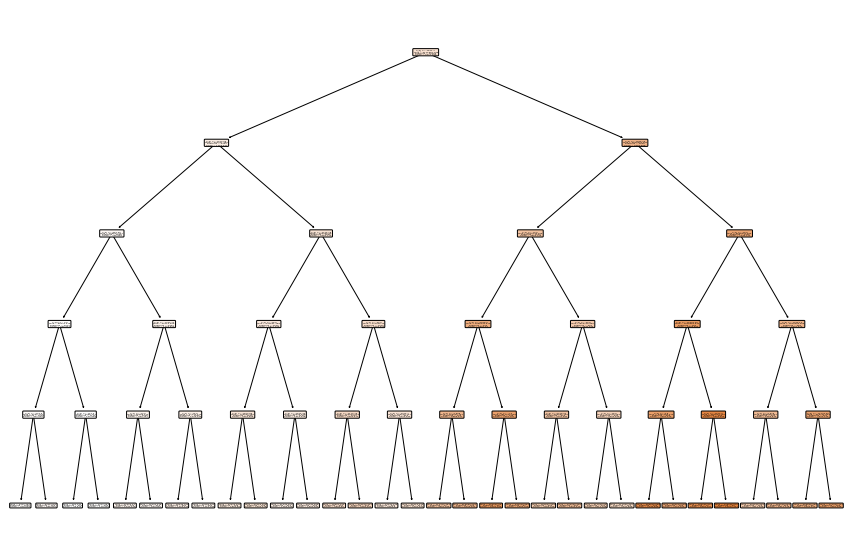

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(
    reg_tree, 
    filled=True,
    rounded=True,
);

# Decision Tree Regressor - Tuning 

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tuning_model=GridSearchCV(reg_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [ ]:
#X=df.iloc[:,:-1]


In [ ]:
#y=df.iloc[:,-1]

In [ ]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
# best model score
tuning_model.best_score_

-591998.7883957286

In [ ]:
#Training Decision Tree With Best Hyperparameters
tuned_hyper_model= DecisionTreeRegressor(max_depth =5, max_features= 'auto',max_leaf_nodes= None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1,splitter= 'best')

In [ ]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 430.1505553385447
MSE: 549222.053000202
RMSE: 741.0951713512928


# Support Vector Resgressor 

In [29]:
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [30]:
reg_svr = SVR(kernel = 'linear')
reg_svr.fit(X_train_sc, y_train)
preds_svr = reg_svr.predict(X_test_sc)
reg_svr.score(X_test_sc, y_test)

0.961854075614748

In [31]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=preds_svr))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=preds_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=preds_svr)))

MAE: 225.68936225317952
MSE: 180233.46448381466
RMSE: 424.5391200864941


# Support Vector Resgressor - Tuning 

In [32]:
param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['linear']}
grid = GridSearchCV(
    reg_svr,
    param_grid,
    refit=True,
    verbose=2)
grid.fit(X_train_sc,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  14.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  18.5s
[CV] END ........................C=1, gamma=1, ke

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear']},
             verbose=2)

In [33]:
grid.best_estimator_


SVR(C=1, gamma=1, kernel='linear')

In [34]:
grid.best_score_

0.9565314103894614

In [36]:
grid_predictions = grid.predict(X_test_sc)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=grid_predictions))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=grid_predictions)))

MAE: 225.68936225317952
MSE: 180233.46448381466
RMSE: 424.5391200864941


# The best regression model :

In [38]:
# Create a Pipeline for our model
pipe = make_pipeline(
    # scale columns 
    StandardScaler(),
    # apply the model
    LinearRegression()
)

pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.9785664818077269